In [60]:
import tensorflow as tf
from tensorflow.keras import datasets, layers , models 
import matplotlib.pyplot as plt
import numpy as np  


In [61]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [62]:
y_train= y_train.reshape(-1,)
y_train[:-5]

array([6, 9, 9, ..., 0, 1, 0], dtype=uint8)

In [63]:
classes = ["airplane" , "automobile" , "bird" , "cat" , "dear" , "dog" , "frog" , "horse" , "ship" , "truck"] 

In [64]:
def plot_sample(X , y , index):
    plt.figure(figsize=(10,4))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


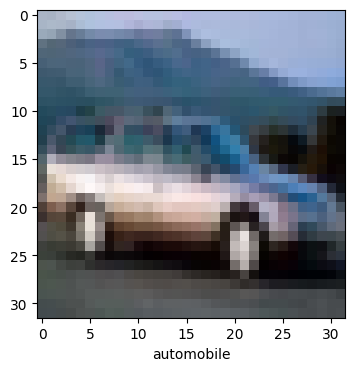

In [65]:
plot_sample(X_train , y_train , 4)

In [66]:
X_train= X_train / 255
X_test = X_test / 255

In [67]:
    ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\manid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.3033 - loss: 1.9347
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4191 - loss: 1.6508
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4531 - loss: 1.5544
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4726 - loss: 1.4866
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4934 - loss: 1.4442


In [68]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4800 - loss: 1.4736


[1.4801586866378784, 0.47290000319480896]

In [69]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),
            
    ])


c:\Users\manid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3713 - loss: 1.7230
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5771 - loss: 1.2016
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6275 - loss: 1.0651
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6560 - loss: 0.9879
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6769 - loss: 0.9316
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 382s 244ms/step - accuracy: 0.6950 - loss: 0.8728
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7070 - loss: 0.8317
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7220 - loss: 0.7978
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7313 - loss: 0.7677
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7433 - loss: 0.7400


In [72]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6692 - loss: 0.9750


[0.9742689728736877, 0.6708999872207642]

In [74]:
y_test = y_test.reshape(-1,)
y_pred= cnn.predict(X_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [75]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 9, 9, 4, 9]

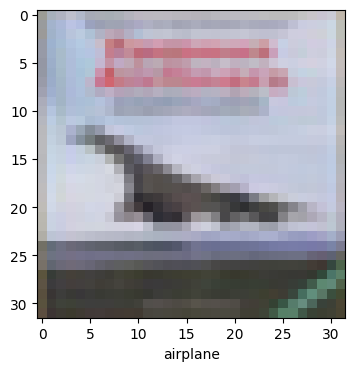

In [79]:
plot_sample(X_test,y_test,3)

In [77]:
classes[y_classes[3]]

'dear'